In [1]:
'''
Clustering: K-Means 
Dataset: Cities_r2.csv 
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. 
Apply K-Means clustering algorithms (based on total_graduates) to find the group of customers.
'''

'\nClustering: K-Means \nDataset: Cities_r2.csv \nApply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. Apply K-Means clustering algorithms (based on total_graduates) to find the group of customers.\n'

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv(r'LP-1_Dataset\K-Means & Hirarchical Clustering\cities_r2.csv')

data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [5]:
data.columns

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')

In [6]:
data.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [7]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [10]:
categorical_cols = ['name_of_city', 'state_name', 'location']
label_encoder = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoder[col] = le

In [13]:
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,0,3,22,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,455,16287,8612,7675
1,1,27,14,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,154,8863,5269,3594
2,2,28,1,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,116,10565,6797,3768
3,3,20,10,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,215,19225,12189,7036
4,4,28,1,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,66,11902,7871,4031


In [43]:
# select relevant column
X = data[['total_graduates']]

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

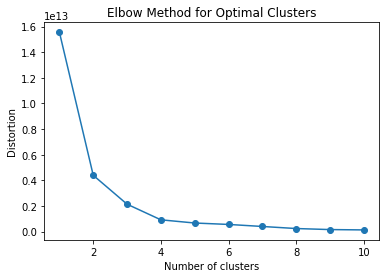

In [44]:
# elbow method for optimal clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


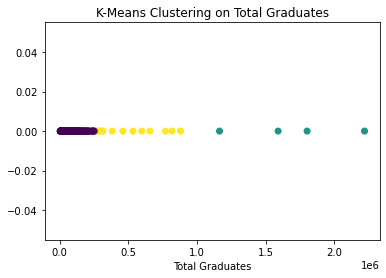

In [50]:
plt.scatter(data['total_graduates'], [0]*len(data), c=data['Cluster'], cmap='viridis')
plt.xlabel('Total Graduates')
plt.title('K-Means Clustering on Total Graduates')
plt.show()

In [51]:
silhouette_avg = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8858127203959241


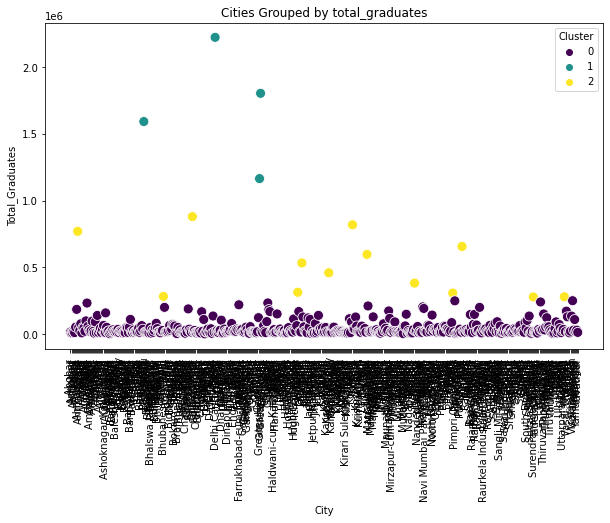

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['name_of_city'], y=data['total_graduates'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Cities Grouped by total_graduates')
plt.xlabel('City')
plt.ylabel('Total_Graduates')
plt.xticks(rotation=90)  # Rotate city names for better readability
plt.show()

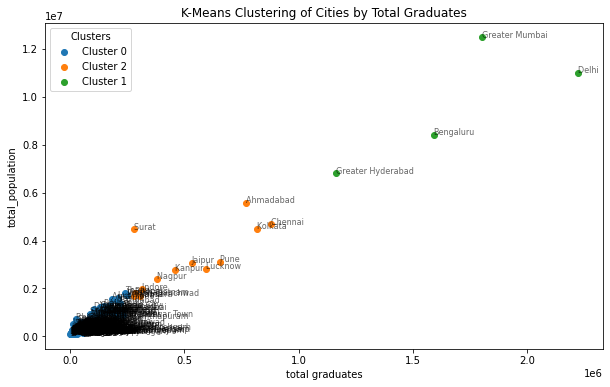

In [53]:
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['total_graduates'],
               cluster_data['population_total'],
               label=f"Cluster {cluster}")

for i, city in enumerate(data['name_of_city']):
    plt.annotate(city, (data['total_graduates'][i], data['population_total'][i]), fontsize=8, alpha=0.6)

plt.xlabel('total graduates')
plt.ylabel('total_population')
plt.legend(title='Clusters')
plt.title('K-Means Clustering of Cities by Total Graduates')
plt.show()